# <span style="color:#0b486b">SIT 112 - Data Science Concepts - Assignment 1</span>

---
Lecturer: Sergiy Shelyag | sergiy.shelyag@deakin.edu.au<br />

School of Information Technology, <br />
Deakin University, VIC 3215, Australia.

### <span style="color:#0b486b">Due: 8pm, Thursday 14th April 2022</span>

---

### <span style="color:#0b486b">Instructions</span>

This notebook has been prepared for you to complete Assignment 1. Some sections have been pre-filled  to help you get started. **The total mark for this data analytics task is 65**.

1. Before you start, read the entire notebook carefully to understand what you need to do. You should also refer to the main instructions in *Assignment1_instructions.pdf*  to know what else you need to complete for this assignment.
2. For each cell marked with *#INSERT YOUR CODE HERE*, you must write your own code in this cell.
3. For each cell marked with *#INSERT YOUR COMMENT HERE*, you must write your own **detailed** explanatory comment in this cell.
4. Just before submission, you must **restart the kernel (Kernel->Restart and clear output)**, run the entire notebook and submit two files:
 1. The source of your solution notebook (download through File -> Download As -> Notebook) : [YourID]_assignment1_solution.ipynb
 2. And an exported version of your output (download through File -> Download As -> html) : [YourID]_assignment1_output.html  
       
For example, if your student ID is 123456, then you need submit two files:

1. **123456_assignment1_solution.ipynb**
2. and **123456_assignment1_output.html**

As you go through this notebook:

* markdown cells marked with **Note** mean description sections.
* markdown cells marked with **Instructions** mean the instructions given to you to complete the sections.

Instructions 5 and 6 are for students aiming at D/HD level. These instructions will not be accepted without Instructions 1-4 attempted. Note there are two "very top HD research question" tasks (Instruction 5 task 7; Instruction 6 task 8), which do not have strict formulations and require top HD level advanced ability to analyse and repurpose data (SIT112 ULO1) as well as top HD level advanced ability to apply critical thinking to understand and visualise relationships in data (SIT112 ULO2).

***If an instruction is not clear, please contact the unit chair or the teaching team as soon as possible.***

***No manual data entry is allowed. Tasks with data entered manually as numbers will be marked at 0.***

In [1]:
#
# Import packages needed for processing
#
import numpy as np   # import the numpy package
import csv           # this package needed for processing csv file
from collections import Counter  # this is for dictionary construction with counting functionality
import matplotlib.pyplot as plt  # this is for plotting and other descriptive statistics
import datetime as dt      # this package is for handling time
#
# If you need add any additional packages, then add them below this line

import pandas as pd
import seaborn as sns
sns.set()
#Pretty Graphs.

**Note**: you must place your data file in the same folder with your notebook.

In [2]:
# Declare the path to the data file
# I used an r string just so I could store the file in my uni folder and direct import from there.
DATA_FILE = r"C:\Users\Bstaj\Desktop\University\2022\Data Science\owid-covid-data.csv"

**Note**. The following segment of codes is to load the data from the .csv file using csv package. It has been provided for you to get started. Please **do not** change this piece of code as well the variable names as we will need these variables to complete subsequent tasks. 

In [3]:
# Load CSV file using DictReader
input_file = csv.DictReader(open(DATA_FILE))
fieldnames = input_file.fieldnames
data_dict = {fn: [] for fn in fieldnames}
print(data_dict.keys())
for line in input_file:
    for k, v in line.items():
        if (v == ''): #quick fix for missing values
            v=0
        try:
            data_dict[k].append(int(v))
        except ValueError:
            try:
                data_dict[k].append(float(v))
            except ValueError:
                data_dict[k].append(v)
                
for k, v in data_dict.items():
    data_dict[k] = np.array(v)

dict_keys(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred

---
## **Instruction 1**
We first examine the variables and the overall data size. The tasks:

1. Write your code to print the type for the following variables (**4 marks**):
    * input_file
    * data_dict
    * data_dict['continent']
    * data_dict['total_cases_per_million']


2. Write your code to print out the number of data records (**1 mark**):

[**Total mark: 5**]

In [4]:
#1. Write you code to print the type for the following variables:
#    * input_file
#    * data_dict
#    * data_dict['continent']
#    * data_dict['total_cases_per_million']

print(type(input_file))
print(type(data_dict))
print(type(data_dict["continent"]))
print(type(data_dict["total_cases_per_million"]))


<class 'csv.DictReader'>
<class 'dict'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
# 2. Write your code to print out the number of data records

# Each record is indexed by an iso_code, therefore the length of that column is the number of records.

print(len(data_dict["iso_code"]))


169483


---
## Instruction 2
The following code segment is designed to calculate some basic statistics from the data for a recent date. The data is stored in **data_filtered_by_date** dictionary. Use this variable in the tasks for this instruction.

**Your task:**
1. Learn how the code, which extracts the data for all countries at a required date, works. Why **try-except** construction is required in this code? Provide the answer. (**2 marks**)
1. Write your code to find and print the minimum and the maximum values of mortality per million in the **total_deaths_per_million** column. (**1 mark**)
2. Write your code to find and print the minimum and the maximum values of cases per million in the **total_cases_per_million** column. (**1 mark**)
3. Write your code to find and print the mean and median mortality per million, and the standard deviation from the **total_deaths_per_million** column. (**2 marks**)
4. Write your code to construct a box plot for the **total_deaths_per_million**. (**2 marks**) 
4. You will find that mean and median values for mortality are quite different. Briefly describe the meaning of the difference between the mean and median mortality per million. Explain in detail, why are they different? (**2 marks**)

**[Total mark: 10]**

In [6]:
# THIS PART EXTRACTS THE DATA FOR ALL COUNTRIES AT A REQUIRED DATE.
# LEARN HOW IT WORKS.
# data_filtered_by_date DICTIONARY CONTAINS ALL DATA FOR ALL COUNTRIES AT required_date

required_date = '2022-03-14'

index_for_date = (data_dict['date'] == required_date)
data_filtered_by_date = {}
for key in data_dict.keys():
    try:
        data_filtered_by_date[key] = np.float_(data_dict[key][index_for_date])
    except:
        data_filtered_by_date[key] = data_dict[key][index_for_date]

In [7]:
# 1. Why **try-except** construction is required in this code? (2 marks)

# The try-except construction is required because the the np.float_() float dtype conversion will not work on string datatypes.
# So when the "try" block of code fails it goes to the "except" block of codes and adds the data from data_dict as is.
# This is mainly relevant for the first 3 keys of data_dict as they are strings and will cause an error if you attempt to change their dtype to float.
# The "try" block will work though for numerical data in the dataset, as they are ints and floats.

In [8]:
# INSERT YOUR CODE HERE
#
# 2. Write your code to find and print the minimum and the maximum values of mortality 
#    per million (key name 'total_deaths_per_million'). (1 mark)

print(np.min(a = data_filtered_by_date["total_deaths_per_million"]))
print(np.max(a = data_filtered_by_date["total_deaths_per_million"]))


0.0
6342.407


In [9]:

# 3. Write your code to find and print the minimum and the maximum values of total cases per million 
# in the total_cases_per_million column. (1 mark)

print(np.min(a = data_filtered_by_date["total_cases_per_million"]))
print(np.max(a = data_filtered_by_date["total_cases_per_million"]))


0.0
706541.904


In [10]:

# 4. Write your code to find and print the mean and median mortality per million, and the standard 
# deviation from the total_deaths_per_million column. (2 marks)

print(np.mean(a = data_filtered_by_date["total_deaths_per_million"]))
print(np.median(a = data_filtered_by_date["total_deaths_per_million"]))
print(np.std(a = data_filtered_by_date["total_deaths_per_million"]))

1079.6936200873363
630.972
1184.907935177207


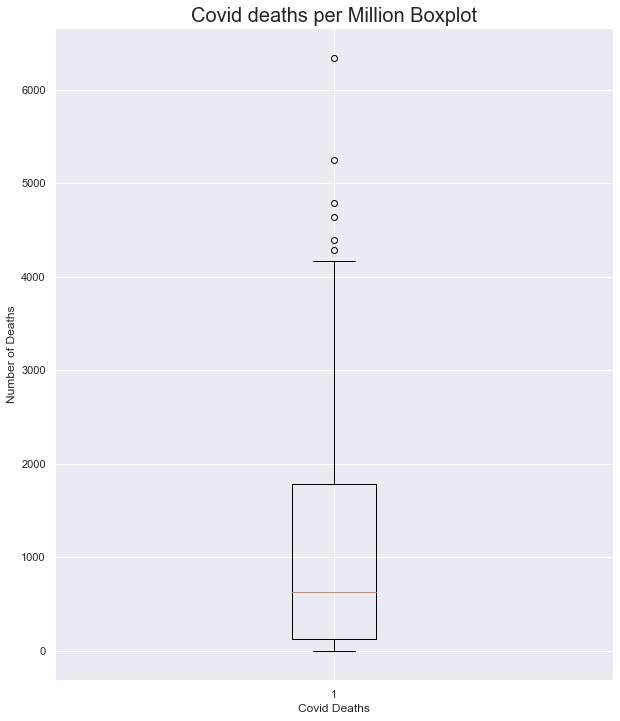

In [11]:

# 5. Write your code to construct a box plot for the COVID mortality total_deaths_per_million.

plt.figure(figsize = (10, 12))
plt.boxplot(x = data_filtered_by_date["total_deaths_per_million"])
plt.title(label = "Covid deaths per Million Boxplot", fontsize = 20)
plt.xlabel(xlabel = "Covid Deaths")
plt.ylabel(ylabel = "Number of Deaths")
plt.show()

In [12]:
# 6. Briefly describe the meaning of the difference between the mean and median COVID mortality per million.
# Explain in detail, why are they different? (2 marks)

# Both are measures of central tendency, however in skewed datasets the mean gets shifted from the centre.
# The Median is measure of the 50th percentile and is a better measure of central tendency for skewed data.
# Looking at the boxplot above, the Covid mortality per million data has a right skew, meaning the data is asymmetric.
# This means the mean is will be lifted higher than the median and they will be different.


---
## **Instruction 3**
This part of the assignment is designed to examine COVID cases and mortality data for different countries. The countries are given by their ISO alpha-3 codes, given here: https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3 .
As in the previous task, we will be using **total_cases_per_million** and **total_deaths_per_million** columns.

**Your tasks**:

1. Write your code to find and print out the number of countries in the dataset. (**1 mark**)
2. Population mortality is measured in the number of deaths per the number of people. The population mortality from seasonal influenza is generally thought to be about 0.01% (1 death per 10000 people). Write your code to find and print out the list of countries with the population mortality greater than ten times of the population mortality of seasonal influenza. (**2 marks**)
3. Write your code to find and print out the country with the highest population mortality. Both the country code and the mortality value for this country need to be printed out (**2 marks**)
4. Write your code to construct a dictionary variable ***data_large_countries*** whose keys are **iso_code**, **total_cases_per_million**, **total_deaths_per_million**, **population**, **population_density**. You can start from the original dataset **data_dict** and adapt the code given to you in Instruction 2 (Task 1). Alternatively, you can use **data_filtered_by_date** and then filter the countries by population. Print the generated dictionary. (**2 marks**)
5. Using the new dictionary ***data_large_countries***, plot a bar chart of mortality sorted in descending order of values for the countries with **population** more than 1 million, achieving first twenty places of leadership in exterminating their own population using COVID. (**3 marks**)
6. Using the same dictionary, plot a bar chart of total cases and population density for the mortality leaders. Use the same order of countries as in Task 5. (**3 marks**)
7. Discuss the bar charts. Which conclusion can you draw, if you look at all of them together? Try to support your conclusions with Pearson correlation coefficients. (**2 marks**)

[**Total mark: 15**]

In [13]:

# 1. Write your code to find and print out the number of countries in the dataset. (1 mark)
# To be sure that you get a list of unique countries, you may want to use np.unique

print(len(np.unique(data_dict["iso_code"]))) # Using the len() function

# Can also extract it from the array shape.

print(np.unique(data_dict["iso_code"]).shape[0]) # Using the shape attribute.

238
238


In [14]:
np.set_printoptions(suppress = True) # Getting rid of scientific notation from numpy outputs.

In [15]:

# 2. Population mortality from seasonal influenza is generally thought to be about 0.01% 
# (1 death per 10000 people). Write your code to find and print out the list of countries 
# with the population mortality is more than ten times of the population mortality of 
# the seasonal influenza. (2 marks)

# Assuming the mortality rate equation is (total deaths/total population)*100

total_deaths = data_filtered_by_date["total_deaths"]

population = data_filtered_by_date["population"]

covid_mortality_rate = np.divide(total_deaths, population, where = population != 0)*100 # Using np.divide() so can use the where argument to stop division by 0.

index_covid_mortality_rate = list(np.squeeze(np.argwhere(covid_mortality_rate > 0.01))) # np.argwhere() to get the indexes.

print(data_filtered_by_date["iso_code"][index_covid_mortality_rate,])

['AFG' 'OWID_AFR' 'ALB' 'DZA' 'AND' 'AIA' 'ATG' 'ARG' 'ARM' 'ABW'
 'OWID_ASI' 'AUS' 'AUT' 'AZE' 'BHS' 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ'
 'BMU' 'BOL' 'BES' 'BIH' 'BWA' 'BRA' 'VGB' 'BRN' 'BGR' 'KHM' 'CAN' 'CPV'
 'CYM' 'CHL' 'COL' 'COM' 'CRI' 'HRV' 'CUB' 'CUW' 'CYP' 'CZE' 'DNK' 'DJI'
 'DMA' 'DOM' 'ECU' 'EGY' 'SLV' 'GNQ' 'EST' 'SWZ' 'OWID_EUR' 'OWID_EUN'
 'FRO' 'FJI' 'FIN' 'FRA' 'PYF' 'GAB' 'GMB' 'GEO' 'DEU' 'GIB' 'GRC' 'GRL'
 'GRD' 'GTM' 'GUY' 'OWID_HIC' 'HND' 'HKG' 'HUN' 'ISL' 'IND' 'IDN' 'IRN'
 'IRQ' 'IRL' 'IMN' 'ISR' 'ITA' 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN' 'KIR'
 'OWID_KOS' 'KWT' 'KGZ' 'LVA' 'LBN' 'LSO' 'LBY' 'LIE' 'LTU' 'OWID_LMC'
 'LUX' 'MWI' 'MYS' 'MDV' 'MLT' 'MRT' 'MUS' 'MEX' 'MDA' 'MCO' 'MNG' 'MNE'
 'MSR' 'MAR' 'MMR' 'NAM' 'NPL' 'NLD' 'NCL' 'OWID_NAM' 'MKD' 'NOR'
 'OWID_OCE' 'OMN' 'PAK' 'PLW' 'PSE' 'PAN' 'PRY' 'PER' 'PHL' 'POL' 'PRT'
 'QAT' 'ROU' 'RUS' 'RWA' 'KNA' 'LCA' 'SPM' 'VCT' 'SMR' 'STP' 'SAU' 'SEN'
 'SRB' 'SYC' 'SGP' 'SVK' 'SVN' 'SLB' 'ZAF' 'OWID_SAM' 'KOR' 'ESP' 'LKA'
 'SDN'

In [16]:

# 3. Write your code to find and print out the country with the highest population mortality. 
# Both the country code and the mortality value for this country need to be printed out (2 marks)
# HINT: You can use np.where or np.argmax functions - please check what these functions are for.

max_covid_mortality_rate = np.argmax(a = covid_mortality_rate)

country = data_filtered_by_date["iso_code"][max_covid_mortality_rate,]

print(str(covid_mortality_rate[max_covid_mortality_rate,]) + "%")
print(country)

0.6342407383342903%
PER


In [17]:

# 4. Write your code to construct a dictionary variable ***data_large_countries*** whose keys are **iso_code**,
# **total_cases_per_million**, **total_deaths_per_million**, **population**, **population_density**.
# You can start from the original dataset **data_dict** and adapt the code given to you in Instruction 2 (Task 1). 
# Alternatively, you can use **data_filtered_by_date** and then filter the countries by population. Print the 
# generated dictionary.
# (**2 marks**)

data_large_countries = {}
keys_for_dict = ["iso_code", "total_cases_per_million", "total_deaths_per_million", "population", "population_density"]

for key in data_filtered_by_date.keys():
    for i in keys_for_dict:
        if key == i:
            data_large_countries[key] = data_filtered_by_date[key]

# Not really sure what the wording of this question was asking, hope this is on the right track.           

print(data_large_countries)

{'iso_code': array(['AFG', 'OWID_AFR', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG',
       'ARM', 'ABW', 'OWID_ASI', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD',
       'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES',
       'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM',
       'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL',
       'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP',
       'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV',
       'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'OWID_EUR', 'OWID_EUN', 'FRO',
       'FLK', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU',
       'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GTM', 'GGY', 'GIN', 'GNB',
       'GUY', 'HTI', 'OWID_HIC', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN',
       'OWID_INT', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN',
       'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KOS', 'KWT', 'KGZ', 'LAO', 'LVA',
       'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 

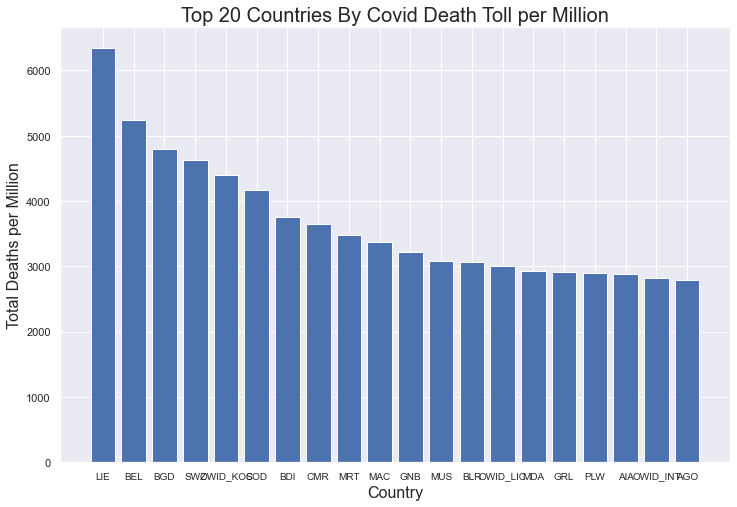

In [18]:

# 5. Using the new dictionary ***data_large_countries***, plot a bar chart of mortality
# sorted in descending order of values for the countries with **population** more than 1 million, 
# achieving first twenty places in exterminating their own population using COVID. (**3 marks**)
#
# HINT: You can use np.argsort.

base_index = list(np.squeeze(np.argwhere(data_large_countries["population"] > 1000000)))

sort_index = np.argsort(a = data_large_countries["total_deaths_per_million"][base_index])

sorted_mortality = np.sort(a = data_large_countries["total_deaths_per_million"][base_index])[::-1]

sorted_countries = data_filtered_by_date["iso_code"][sort_index][::-1]

plt.figure(figsize = (12, 8))
plt.bar(sorted_countries[:20,], sorted_mortality[:20,])
plt.title(label = "Top 20 Countries By Covid Death Toll per Million", fontsize = 20)
plt.ylabel(ylabel = "Total Deaths per Million", fontsize = 16)
plt.xlabel(xlabel = "Country", fontsize = 16)
plt.xticks(fontsize = 10)
plt.show()

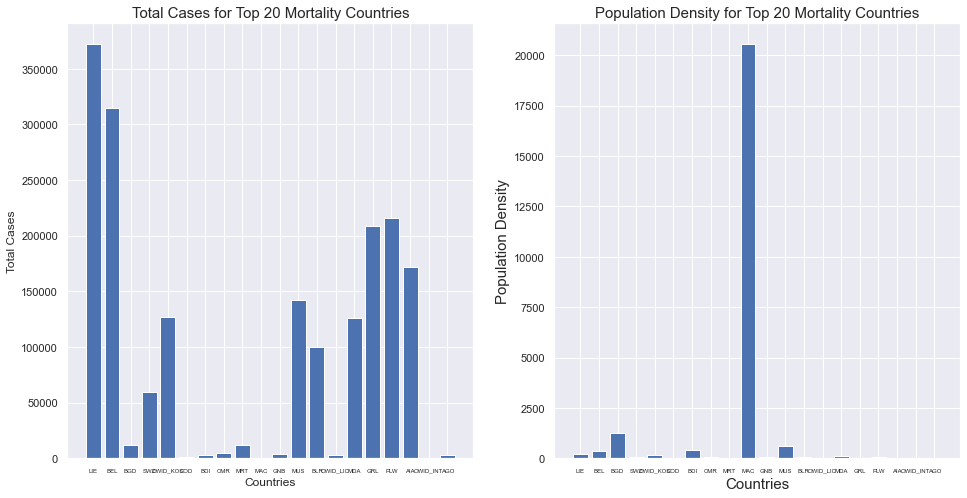

In [19]:

# 6. Using the same dictionary, plot a bar chart of total cases and population density for the mortality leaders.
# Use the same order of countries as in Task 5. (**3 marks**)
#
# HINT: you want to plot these bar charts side by side (two separate plots side by side for easy comparison).

sorted_total_cases = data_large_countries["total_cases_per_million"][sort_index][::-1]
sorted_pop_density = data_large_countries["population_density"][sort_index][::-1]

plt.figure(figsize = (16, 8))

plt.subplot(1, 2, 1)
plt.bar(sorted_countries[:20], sorted_total_cases[:20])
plt.xticks(fontsize = 6)
plt.title(label = "Total Cases for Top 20 Mortality Countries", fontsize = 15)
plt.xlabel(xlabel = "Countries", fontsize = 12)
plt.ylabel(ylabel = "Total Cases", fontsize = 12)

plt.subplot(1, 2, 2)
plt.bar(sorted_countries[:20], sorted_pop_density[:20])
plt.xticks(fontsize = 6)
plt.title(label = "Population Density for Top 20 Mortality Countries", fontsize = 15)
plt.xlabel(xlabel = "Countries", fontsize = 15)
plt.ylabel(ylabel = "Population Density", fontsize = 15)

plt.show()

In [20]:
# 7. Discuss the bar charts. Which conclusion can you draw, if you look at all of them together? 
# Try to support your conclusions with Pearson correlation coefficients. (**2 marks**)

# There may be a relationship between population density and total cases and deaths per million.
# Only was to tell is by obtaining the correlation coefficents between the variables.

print(np.corrcoef(x = data_large_countries["population_density"], y = data_large_countries["total_deaths_per_million"])[0, 1])
print(np.corrcoef(x = data_large_countries["population_density"], y = data_large_countries["total_cases_per_million"])[0, 1])

# These correlation values are not very good, little to no relation.

-0.03995776251079708
0.044203702485254195


---
## **Instruction 4**
Let's now look at the other end of the COVID spread - at the countries with large populations (more than 1 million) and with the minimal number of cases and deaths. We can use the same dataset ***data_large_countries*** we have prepared in the previous task.

**Your tasks here are:**
1. Using the new dictionary ***data_large_countries***, plot bar charts of mortality per million, cases per million and population density for the 20 countries with **population** more than 1 million and minimal mortality. (**3 marks**)
2. In the bar charts you have got you should see one or two very clear exceptions. Describe their properties. What makes them exceptional? (**2 marks**)

[**Total mark: 5**]

In [21]:
# Just storing the sorts from the previous task in new variables to make life easier.
sorted_mortality_2 = np.sort(a = data_large_countries["total_deaths_per_million"][base_index])
sorted_countries_2 = data_filtered_by_date["iso_code"][sort_index]
sorted_total_cases_2 = data_large_countries["total_cases_per_million"][sort_index]
sorted_pop_density_2 = data_large_countries["population_density"][sort_index]

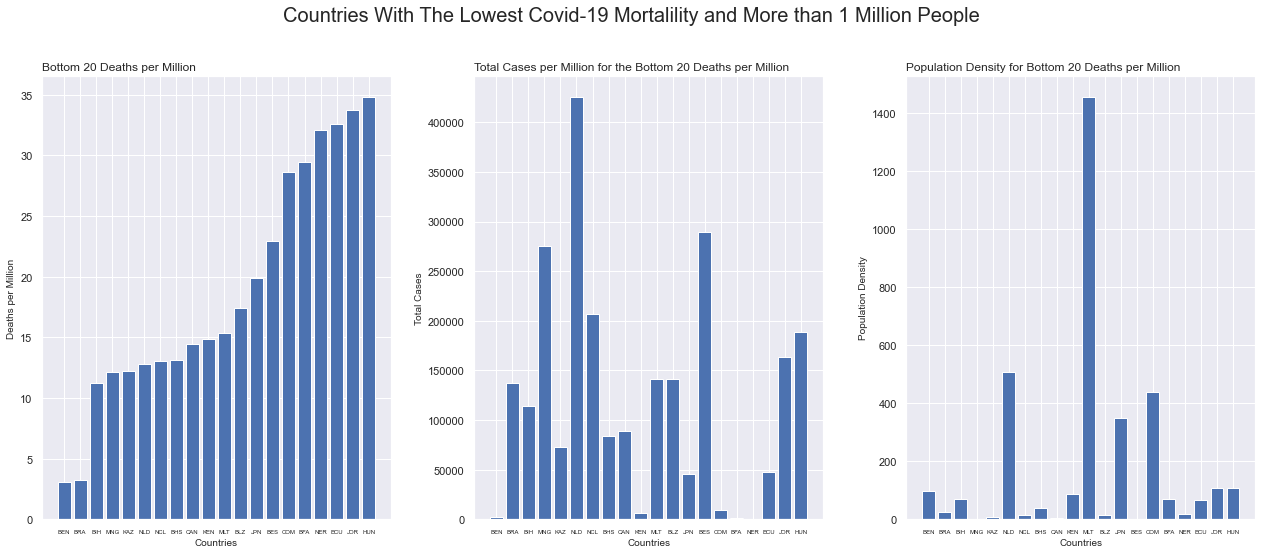

In [22]:
# 1. Using the new dictionary ***data_large_countries***, plot bar charts of mortality per million, 
# cases per million and population density for the 20 countries with **population** more than 1 
# million and minimal mortality. (**3 marks**)

plt.figure(figsize = (18, 8))
plt.suptitle(t = "Countries With The Lowest Covid-19 Mortalility and More than 1 Million People", fontsize = 20)

plt.subplot(1, 3, 1)
plt.bar(sorted_countries_2[:20], sorted_mortality_2[:20])
plt.title(label = "Bottom 20 Deaths per Million", fontsize = 12, loc = "left")
plt.xticks(fontsize = 6)
plt.xlabel(xlabel = "Countries", fontsize = 10)
plt.ylabel(ylabel = "Deaths per Million", fontsize = 10)

plt.subplot(1, 3, 2)
plt.bar(sorted_countries_2[:20, ], sorted_total_cases_2[:20])
plt.title(label = "Total Cases per Million for the Bottom 20 Deaths per Million", fontsize = 12, loc = "left")
plt.xticks(fontsize = 6)
plt.xlabel(xlabel = "Countries", fontsize = 10)
plt.ylabel(ylabel = "Total Cases", fontsize = 10)

plt.subplot(1, 3, 3)
plt.bar(sorted_countries_2[:20], sorted_pop_density_2[:20])
plt.title(label = "Population Density for Bottom 20 Deaths per Million", fontsize = 12, loc = "left")
plt.xticks(fontsize = 6)
plt.xlabel(xlabel = "Countries", fontsize = 10)
plt.ylabel(ylabel = "Population Density", fontsize = 10)

plt.tight_layout(pad = 2) # Bit of overlap needed fixing.

plt.show()


In [23]:
# 2. In the bar charts you have got you should see one or two very clear exceptions. 
# Describe their properties. What makes them exceptional? (**2 marks**)

# Benin is the lowest mortality per million, it also has a very low total case per million number and a low pop density.
# Benin is in a poorer part of Africa and may therefore have poorer public health organizations to moniter cases and deaths.

# Brazil is listed second for mortality per million.
# This is interesting because Brazil is oftern regarded as a covid control failure story.
# This makes it an interesting exception to the rest of the countries plotted.


---
## **Instruction 5 (D/HD level)**

We will return back to the differences between the countries in their ways of dealinig with epidemics in Instruction 6. Now, however, we shall look at the basics of epidemiological processes from the point of view
of real data. Generally, epidemics evolve exponentially until they are either stopped by some measures (lockdowns, vaccinations) or saturate (population dies out and/or gets naturally immune).

**Your tasks**:

1. Define a function called **convert_date** that takes date string (in the format as it is given in the dataset csv file) as the input and returns the number of days from that date until now. The number should be negative. For example, today is 14/3/22. The input date is 3/3/22. The function should compute the difference between the input date and today's date and return -11. If the function argument is in incorrect form, the function should return 0. Don't forget to test it. (**2 marks**)
2. Pick three countries, which may be interesting or relevant for you. For me they are the UK, Ukraine and Australia (iso codes GBR, UKR, AUS). For demonstration purpose you want to include Australia or another country, which was able to deal with the COVID epidemics more or less successfully, and a country with large number of cases. Make a new list **country_list**, which contains iso codes of the countries. (**1 mark**)
3. Plot how **total_cases** for the countries you have picked, grow in time. All three curves have to be on the same plot with the horizontal axis of "Number of days before today". Don't forget the legend. (**2 marks**)
4. If you have chosen the countries appropriately, you will see that the plot you have produced is not very informative. Why is it so? How many waves do you see for Australia? What can you do to make it more informative and to reveal the true dynamics? Note there are **two** reasons, you need to provide both. (**1 mark**)
5. Implement the idea from Task 4 and make a plot, similar to task 3. (**2 marks**)
6. Explain what you see in the new plot. Do you see specific regions of interest in the epidemic curves? Discuss them. How many waves do you see now? (**2 marks**)
7. There are many more interesting dependencies you can produce in this part, and you are welcome to do so. Also, if you implement everything correctly, you don't need to limit yourself to three countries only. To score full mark in this task, you need to provide a **detailed** comparative analysis of epidemic growth (cases and mortality) for two countries, which are similar by their population, but different by their vaccination rates. (**5 marks**)

[**Total mark: 15**]



In [24]:
# 1. Define a function called **convert_date** that takes date string (in the format as it is given 
# in the dataset csv file) as the input and returns the number of days from that date until now. The 
# number should be negative. For example, today is 14/3/22. The input date is 3/3/22. The function 
# should return -11. If the function argument is in incorrect form, the function should return 0. 
# (**2 marks**)
#    
# Hint: you might want to use datetime package.

def convert_date(date):
    try:
        given_datetime = dt.datetime.strptime(date, "%Y-%m-%d")
        given_date = given_datetime.date() # Datetime function returns datetime object, need to extract the date.
        current_date = dt.datetime.now().date() # Getting the current datetime as an object then extracting the date.
        time_delta = current_date - given_date # Obtaines a timedelta object, which has a days attribute.
        return -time_delta.days
    except:
        days = 0 # If incorrect function argument, just returns 0.
        return days


In [25]:
print(convert_date('2020-03-07')) # With the correct argument.
print(convert_date('blah')) # With the incorrect argument.

-767
0


In [26]:
# 2. Pick three countries, which may be interesting or relevant for you. For me they are the UK, 
# Ukraine and Australia (iso codes GBR, UKR, AUS). For demonstration purpose you want to include 
# Australia or another country, which was able to deal with the COVID epidemics more or less 
# successfully, and a country with large number of cases. Make a new list **country_list**, which 
# contains iso codes of the countries. (**1 mark**)

country_list = ["AUS", "TWN", "USA"] # Australia, Taiwan and the United States. Aus and Twn are covid sucess stories, USA is not.


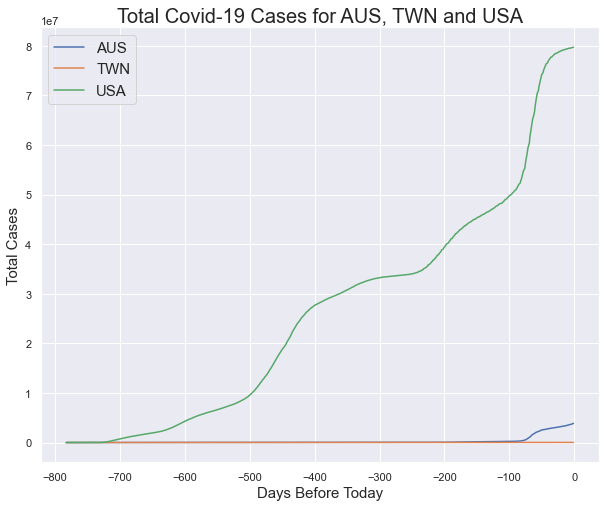

In [27]:
# 3. Plot how **total_cases** for the countries you have picked, grow in time. All three curves 
# have to be on the same plot with the horizontal axis of "Number of days before today". Don't 
# forget the legend. (**2 marks**)

AUS_index = list(np.squeeze(np.argwhere(data_dict["iso_code"] == "AUS")))
AUS_total_cases = data_dict["total_cases"][AUS_index]

TWN_index = list(np.squeeze(np.argwhere(data_dict["iso_code"] == "TWN")))
TWN_total_cases = data_dict["total_cases"][TWN_index]
TWN_total_cases = TWN_total_cases[8:] # Removing the first 8 dates to get the shapes matching, not negletting too much data.

USA_index = list(np.squeeze(np.argwhere(data_dict["iso_code"] == "USA")))
USA_total_cases = data_dict["total_cases"][USA_index]
USA_total_cases = USA_total_cases[4:] # Removing the first 4 dates to get the shapes matching, not negletting too much data.

x_axis = np.arange(-AUS_total_cases.shape[0], 0)

plt.figure(figsize = (10, 8))
plt.plot(x_axis, AUS_total_cases)
plt.plot(x_axis, TWN_total_cases)
plt.plot(x_axis, USA_total_cases)
plt.title(label = "Total Covid-19 Cases for AUS, TWN and USA", fontsize = 20)
plt.ylabel(ylabel = "Total Cases", fontsize = 15)
plt.xlabel(xlabel = "Days Before Today", fontsize = 15)
plt.legend(labels = country_list, fontsize = 15)
plt.show()

In [28]:
# 4. If you have chosen the countries appropriately, you will see that the plot you have produced 
# is not very informative. Why is it so? How many waves do you see for Australia? What can you do 
# to make it more informative and to reveal the true dynamics? Note there are **two** reasons, you 
# need to provide both. (**1 mark**)

# Australia and Taiwan are dwarfed, only one wave is visible for AUS.

#1

# It is not informative because it features total cases for countries of different populations 
# so the countries are not comparable.
# Eg. the USA has a much larger population than Australia and Taiwan and will therefore have more cases.
# Needs would be better if we used per capita cases, like cases per million.

#2

# Second reason is that pandemics follow exponential growth curves, meaning the y-axis scale increases rapidly.
# This makes the case totals for some countries look smaller, because they are dwarfed by countries with huge growth.
# Eg. USA dwarfs Australia in our graph because of their huge covid_19 case growth.
# This can be adjusted by doing changing the y axis scale to a logarithmic scale.
# This linearizes the data and makes it much more informative.


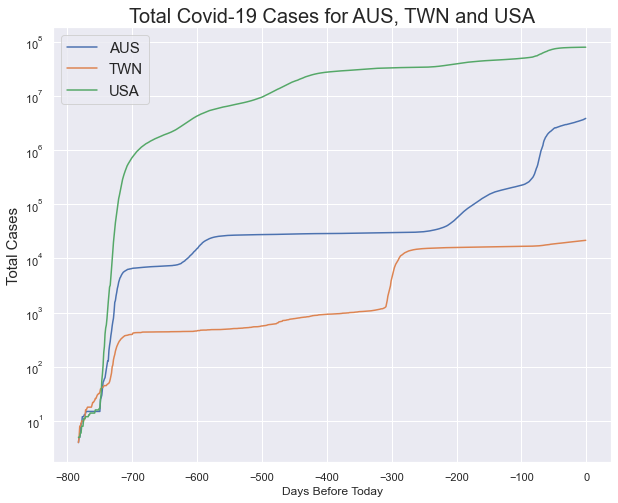

In [29]:
# 5. Implement the idea from Task 4 and make a plot, similar to task 3. (**2 marks**)

plt.figure(figsize = (10, 8))
plt.plot(x_axis, AUS_total_cases)
plt.plot(x_axis, TWN_total_cases)
plt.plot(x_axis, USA_total_cases)
plt.title(label = "Total Covid-19 Cases for AUS, TWN and USA", fontsize = 20)
plt.ylabel(ylabel = "Total Cases", fontsize = 15)
plt.xlabel(xlabel = "Days Before Today")
plt.legend(labels = country_list, fontsize = 15)
plt.yscale("log") # Setting the y-axis as a log scale.
plt.show()


In [30]:
# 6. Explain what you see in the new plot. Do you see specific regions of interest in the epidemic curves? Discuss them. 
# How many waves do you see now? (**2 marks**)

# In the new plot, all of the virus waves are observable.
# This is particularly relevant for Australia where the latest omicron wave overshadowed the previous waves.
# The Australian line now shows all of the previous waves.
# This chart also shows that Australia's recent covid outbreak is similar to the USA in intensity.
# And it shows the success of Taiwan in suppressing previoys outbreaks.

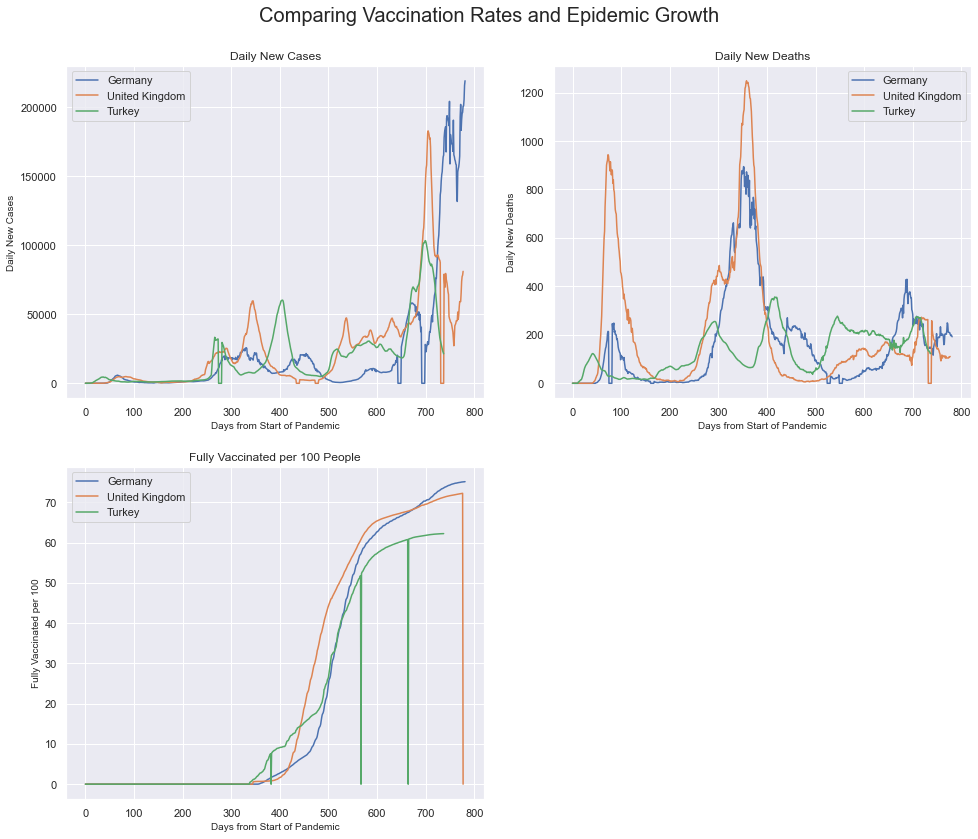

In [31]:
# 7. There are many more interesting dependencies you can produce in this part, and you are welcome to do so. 
# Also, if you implement everything correctly, you don't need to limit yourself to three countries only. To 
# score full mark in this task, you need to provide a **detailed** comparative analysis of epidemic growth 
# (cases and mortality) for two countries, which are similar by their population, but different by their 
# vaccination rates. (**5 marks**)

# I Chose Germany, UK and Turkey for this exercise.
# These countries have similar populations but differnt vaxx numbers.

country_list_2 = ["Germany", "United Kingdom", "Turkey"]

GER_index = list(np.squeeze(np.argwhere(data_dict["iso_code"] == "DEU")))
GER_full_vacc_per_100 = data_dict["people_fully_vaccinated_per_hundred"][GER_index]
GER_new_cases = data_dict["new_cases_smoothed"][GER_index]
GER_new_deaths = data_dict["new_deaths_smoothed"][GER_index]

UK_index = list(np.squeeze(np.argwhere(data_dict["iso_code"] == "GBR")))
UK_full_vacc_per_100 = data_dict["people_fully_vaccinated_per_hundred"][UK_index]
UK_new_cases = data_dict["new_cases_smoothed"][UK_index]
UK_new_deaths = data_dict["new_deaths_smoothed"][UK_index]

Turkey_index = list(np.squeeze(np.argwhere(data_dict["iso_code"] == "TUR")))
Turkey_full_vacc_per_100 = data_dict["people_fully_vaccinated_per_hundred"][Turkey_index]
Turkey_new_cases = data_dict["new_cases_smoothed"][Turkey_index]
Turkey_new_deaths = data_dict["new_deaths_smoothed"][Turkey_index]

plt.figure(figsize = (14, 12))

plt.subplot(2, 2, 1)
plt.title(label = "Daily New Cases", fontsize = 12)
plt.plot(GER_new_cases)
plt.plot(UK_new_cases)
plt.plot(Turkey_new_cases)
plt.xlabel(xlabel = "Days from Start of Pandemic", fontsize = 10)
plt.ylabel(ylabel = "Daily New Cases", fontsize = 10)
plt.legend(labels = country_list_2)

plt.subplot(2, 2, 2)
plt.title(label = "Daily New Deaths", fontsize = 12)
plt.plot(GER_new_deaths)
plt.plot(UK_new_deaths)
plt.plot(Turkey_new_deaths)
plt.xlabel(xlabel = "Days from Start of Pandemic", fontsize = 10)
plt.ylabel(ylabel = "Daily New Deaths", fontsize = 10)
plt.legend(labels = country_list_2)

plt.subplot(2, 2, 3)
plt.title(label = "Fully Vaccinated per 100 People", fontsize = 12)
plt.plot(GER_full_vacc_per_100)
plt.plot(UK_full_vacc_per_100)
plt.plot(Turkey_full_vacc_per_100)
plt.xlabel(xlabel = "Days from Start of Pandemic", fontsize = 10)
plt.ylabel(ylabel = "Fully Vaccinated per 100", fontsize = 10)
plt.legend(labels = country_list_2)

plt.suptitle("Comparing Vaccination Rates and Epidemic Growth", fontsize = 20)
plt.tight_layout(pad = 1.8) # Better subplot spacing.

plt.show()

# This comparative analysis shows that increasing vaccination rates in these countries has lowered total deaths.
# Daily new cases counts are still at there highest levels however.
# This shows the strength of the Omicron wave and reduced efficacy of vaccines to defend against it.


---
## **Instruction 6** (D/HD level)
In this part of the assignment, we go back to the current state of affairs with COVID and look deeper into the dependencies between the parameters of the COVID epidemic and population parameters. We get back to the dataset we have created, namely **data_filtered_by_date**. This dataset also contains population parameters, for example, population and population density, median age, GDP per capita, human development index, and so on.

NOTE: If you are curious, you may want to limit the number of countries you plot by some condition (similar to what we did above by limiting countries to ones with population above 1 million. The mark will not be affected if you don't.

You will need to carefully get rid of all Python warnings in this section to score the full mark.

1. First of all, let's confirm what we saw before in Instructions 3 and 4, namely, counterintuitvely weak or no dependence of the number of cases and mortality on average population density. You need to plot two scatter plots of total mortality and total case numbers per million on population density. Take logarithm base 10 of the population density. (**1 mark**)
2. Annotate the scatter plots with the iso codes of countries. (**1 mark**)
3. Make scatter plots of the mortality and case numbers on GDP per capita and annotate them with the iso codes of countries. (**1 mark**)
4. Discuss what you see in these scatter plots. Strange, isn't it? What do you think are the reasons? There can be many. (**2 marks**)
5. Make and annotate scatter plot of median age vs mortality and meadian age vs log10 of gdp per capita. Would log10 make the plot clearer? (**1 mark**)
6. Use numpy **polyfit** or **polynomial** function to fit a straight line in the last scatter plot (median age vs gdp per capita). Overplot the line. Note - IT CAN BE HARD! (**2 marks**)
7. Discuss the scatter plots. (**2 marks**)
8. Find another interesting dependence in the data using other variables (for example, use vaccination information), plot, analyse and discuss it. (**5 marks**)

[**Total mark: 15**]

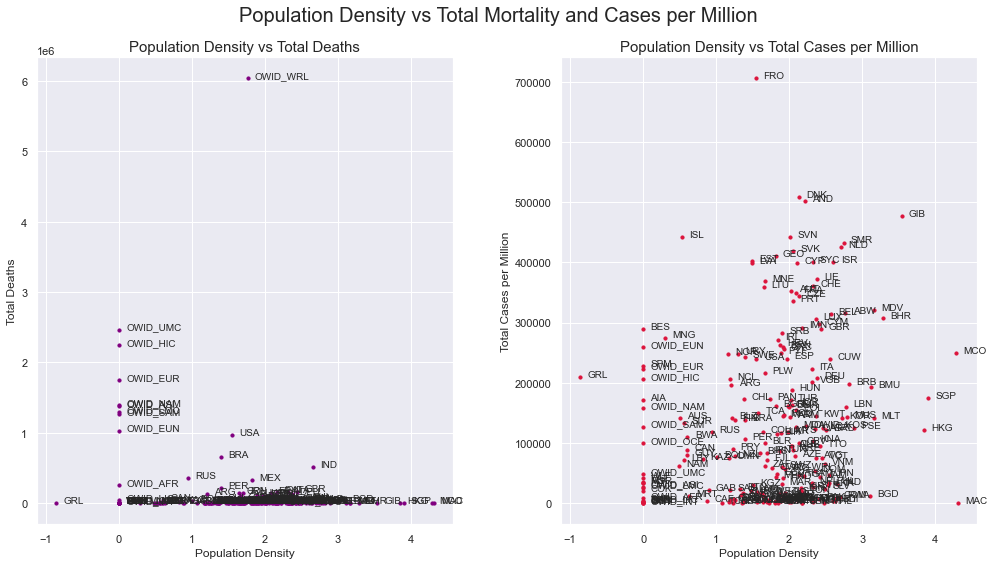

In [32]:
# 1. First of all, let's confirm what we saw before in Instructions 3 and 4, namely, 
# counterintuitvely weak or no dependence of the number of cases and mortality on average 
# population density. You need to plot two scatter plots of total mortality and total 
# case numbers per million on population density. Take logarithm base 10 of the population 
# density. (**2 marks**)
# 2. Annotate the scatter plots with the iso codes of countries. (**1 mark**)

pop_density = data_filtered_by_date["population_density"]
pop_density[list(np.squeeze(np.argwhere(pop_density == 0)))] = 1 # Getting ride of the log10 error by making 0 values 1.

log_pop_density = np.log10(pop_density)

plt.figure(figsize = (14, 8))
plt.suptitle(t = "Population Density vs Total Mortality and Cases per Million", fontsize = 20)

plt.subplot(1, 2, 1)
plt.title(label = "Population Density vs Total Deaths", fontsize = 15)
plt.xlabel(xlabel = "Population Density", fontsize = 12)
plt.ylabel(ylabel = "Total Deaths", fontsize = 12)
plt.scatter(x = log_pop_density, y = data_filtered_by_date["total_deaths"], marker = "o", s = 10, c = "purple")
for n in range(0, len(log_pop_density)):
    plt.annotate(text = data_filtered_by_date["iso_code"][n], xy = (log_pop_density[n] + 0.1, data_filtered_by_date["total_deaths"][n] + 0.1), fontsize = 10)

plt.subplot(1, 2, 2)
plt.title(label = "Population Density vs Total Cases per Million", fontsize = 15)
plt.xlabel(xlabel = "Population Density", fontsize = 12)
plt.ylabel(ylabel = "Total Cases per Million", fontsize = 12)
plt.scatter(x = log_pop_density, y = data_filtered_by_date["total_cases_per_million"], marker = "o", s = 10, c = "crimson")
for n in range(0, len(log_pop_density)):
    plt.annotate(text = data_filtered_by_date["iso_code"][n], xy = (log_pop_density[n] + 0.1, data_filtered_by_date["total_cases_per_million"][n] + 0.1), fontsize = 10)

plt.tight_layout(w_pad = 3)

plt.show()

# Very messy I know, would look better if I used used a smaller collection of countries.

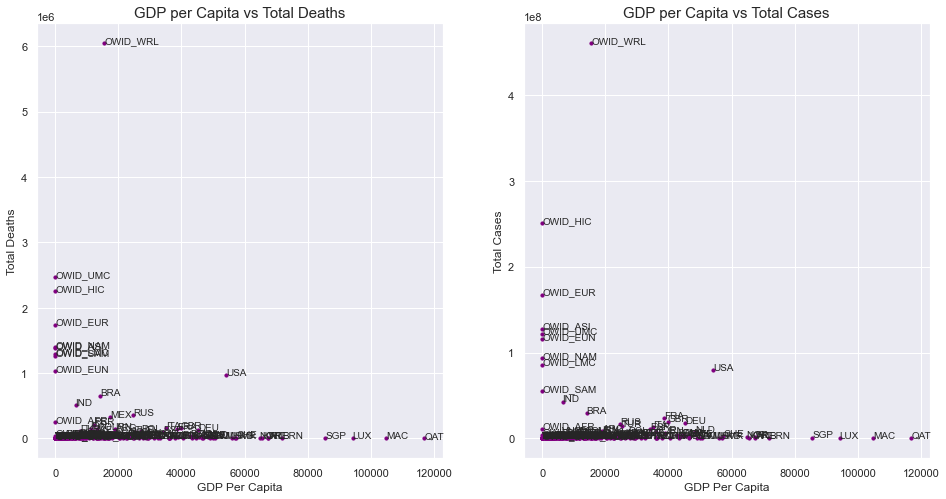

In [33]:
# 3. Make scatter plots of the mortality and case numbers on GDP per capita and annotate them with 
# the iso codes of countries. (**1 mark**)

mortality_arr = data_filtered_by_date["total_deaths"]
cases_arr = data_filtered_by_date["total_cases"]
gdp_per_capita = data_filtered_by_date["gdp_per_capita"]

plt.figure(figsize = (16, 8))

plt.subplot(1, 2, 1)
plt.title(label = "GDP per Capita vs Total Deaths", fontsize = 15)
plt.xlabel(xlabel = "GDP Per Capita", fontsize = 12)
plt.ylabel(ylabel = "Total Deaths", fontsize = 12)
plt.scatter(x = gdp_per_capita, y = mortality_arr, marker = "o", s = 10, c = "purple")
for n in range(0, len(log_pop_density)):
    plt.annotate(text = data_filtered_by_date["iso_code"][n], xy = (gdp_per_capita[n] + 0.1, mortality_arr[n] + 0.1), fontsize = 10)

plt.subplot(1, 2, 2)
plt.title(label = "GDP per Capita vs Total Cases", fontsize = 15)
plt.xlabel(xlabel = "GDP Per Capita", fontsize = 12)
plt.ylabel(ylabel = "Total Cases", fontsize = 12)
plt.scatter(x = gdp_per_capita, y = cases_arr, marker = "o", s = 10, c = "purple")
for n in range(0, len(log_pop_density)):
    plt.annotate(text = data_filtered_by_date["iso_code"][n], xy = (gdp_per_capita[n] + 0.1, cases_arr[n] + 0.1), fontsize = 10)

plt.show() # Messy because of the OWID outliers.

In [34]:
# 4. Discuss what you see in these scatter plots. Strange, isn't it? What do you think are 
# the reasons? There can be many. (**2 marks**)

# It looks as though a lower GDP per capita have higher total death counts and higher total case counts.
# The higher deaths could be a function of poorer funding for healthcare and hospitals.
# This means severe COVID patients not recieving adequate treatment and therefore dying.
# The higher case counts could also be a function of lower funding for public health insitutions.
# Meaning higher spread.
# It could also be related to poverty conditions enabling easer spread of the virus.


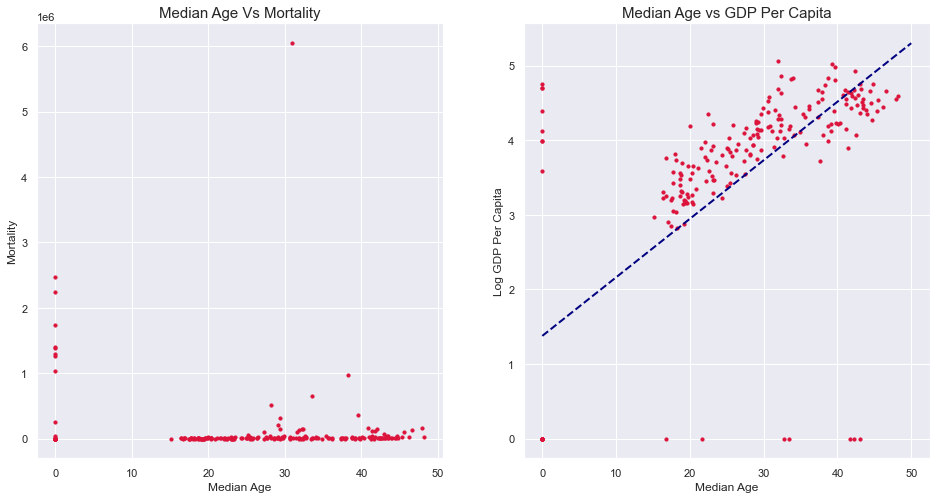

In [35]:
# 5. Make and annotate scatter plot of median age vs mortality and meadian age vs gdp per capita. 
# Would log10 make the plot clearer? (**1 mark**)

gdp_per_capita[list(np.squeeze(np.argwhere(gdp_per_capita == 0)))] = 1 # Making the zero's in the array 1 to get rid of log10 error.

median_age = data_filtered_by_date["median_age"]
log_gdp_per_capita = np.log10(gdp_per_capita) # Log for gdp data to linearize it.
np.linspace(start = 0, stop = 50)

plt.figure(figsize = (16, 8))

plt.subplot(1, 2, 1)
plt.title(label = "Median Age Vs Mortality", fontsize = 15)
plt.xlabel(xlabel = "Median Age", fontsize = 12)
plt.ylabel(ylabel = "Mortality", fontsize = 12)
plt.scatter(x = median_age, y = mortality_arr, marker = "o", s = 10, c = "crimson")

# 6. Use numpy polyfit or polynomial function to fit a straight line in the last scatter plot (median age vs gdp per 
# capita). Overplot the line. (**2 marks**)

plt.subplot(1, 2, 2)
plt.title(label = "Median Age vs GDP Per Capita", fontsize = 15)
plt.xlabel(xlabel = "Median Age", fontsize = 12)
plt.ylabel(ylabel = "Log GDP Per Capita", fontsize = 12)
plt.scatter(x = median_age, y = log_gdp_per_capita, marker = "o", s = 10, c = "crimson")
x_0 = np.linspace(0, 50)
lin_mod_1 = np.polyfit(x = median_age, y = log_gdp_per_capita, deg = 1)
yhat_1 = lin_mod_1[0]*x_0 + lin_mod_1[1]
plt.plot(x_0, yhat_1, lw = 2, linestyle = "--", c = "navy")


plt.show()



In [36]:
# 7. Discuss the last scatter plots. (**2 marks**)

# Cant make anything out from the Median Age Vs Mortality graph due to outliers.
# On the Median Age vs Log GDP per Capita scatter there is a clear positive correlation between median age and GDP per capita.
# Ignoring outliers and the 0 values from the fix I did in the cell above.

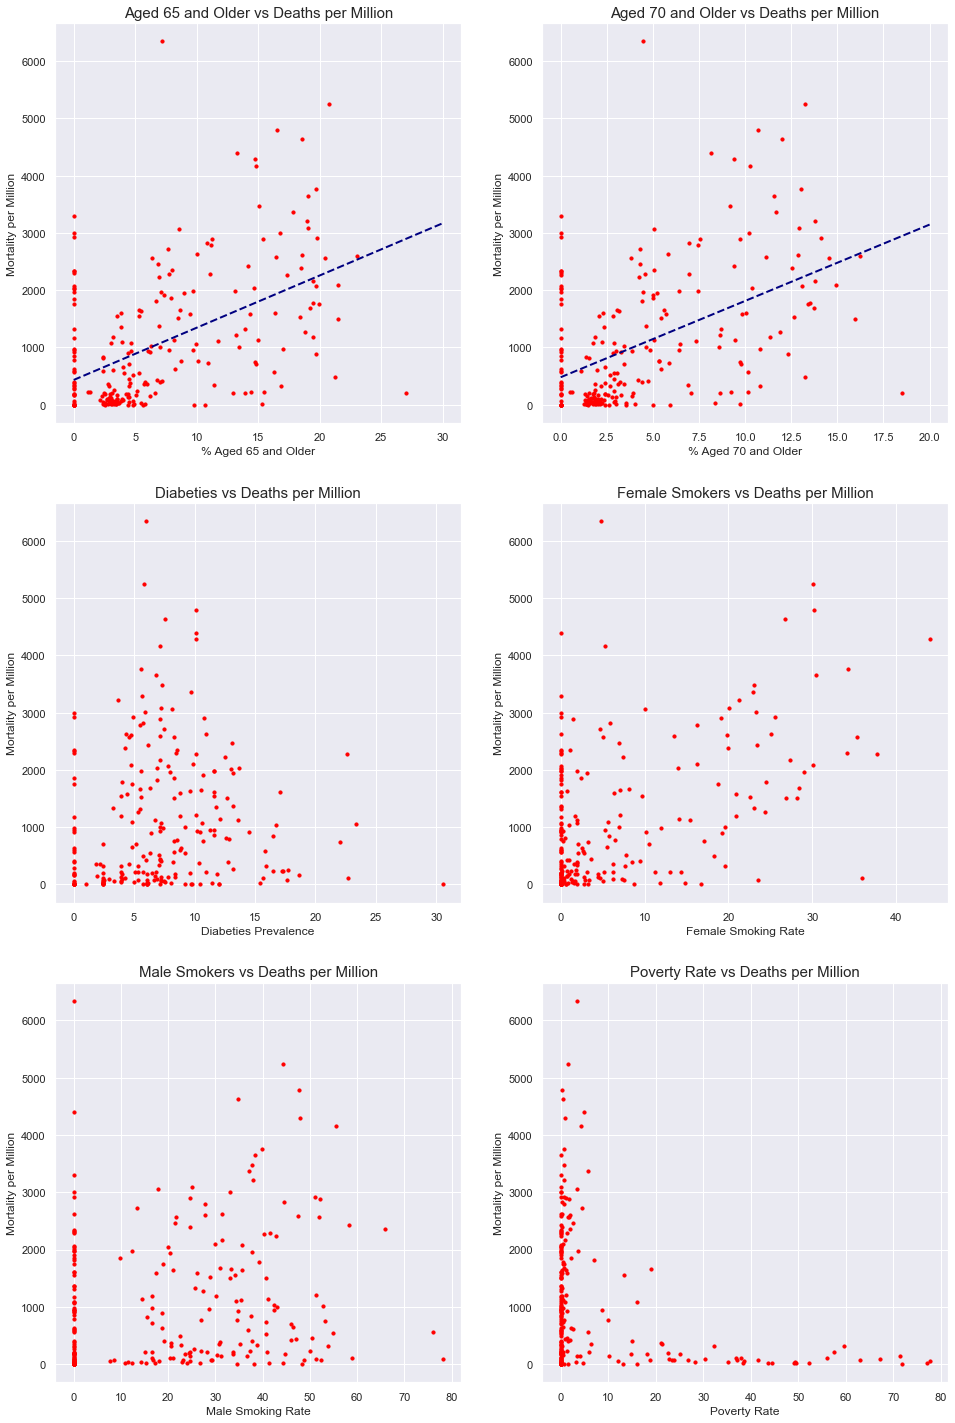

In [37]:
# 8. Find another interesting dependence in the data using other variables (for example, use vaccination information), 
# plot, analyse and discuss it. (**5 marks**)

# Lets look at all the risk factors for covid.
# Age, health, smoking status etc.
# Also lets chuck in extreme poverty.

mortality_per_mil = data_filtered_by_date["total_deaths_per_million"]

aged_65_over = data_filtered_by_date["aged_65_older"]
aged_70_over = data_filtered_by_date["aged_70_older"]
diabeties = data_filtered_by_date["diabetes_prevalence"]
female_smokers = data_filtered_by_date["female_smokers"]
male_smokers = data_filtered_by_date["male_smokers"]
poverty = data_filtered_by_date["extreme_poverty"]

plt.figure(figsize = (16, 25))

plt.subplot(3, 2, 1)
plt.title(label = "Aged 65 and Older vs Deaths per Million", fontsize = 15)
plt.scatter(x = aged_65_over, y = mortality_per_mil, marker = "o", s = 10, c = "red")
plt.xlabel(xlabel = "% Aged 65 and Older", fontsize = 12)
plt.ylabel(ylabel = "Mortality per Million", fontsize = 12)
lin_mod_2 = np.polyfit(x = aged_65_over, y = mortality_per_mil, deg = 1)
x_1 = np.linspace(start = 0, stop = 30)
yhat_2 = lin_mod_2[0]*x_1 + lin_mod_2[1]
plt.plot(x_1, yhat_2, linestyle = "--", c = "navy", lw = 2) # Regression line.

plt.subplot(3, 2, 2)
plt.title(label = "Aged 70 and Older vs Deaths per Million", fontsize = 15)
plt.scatter(x = aged_70_over, y = mortality_per_mil, marker = "o", s = 10, c = "red")
plt.xlabel(xlabel = "% Aged 70 and Older", fontsize = 12)
plt.ylabel(ylabel = "Mortality per Million", fontsize = 12)
lin_mod_3 = np.polyfit(x = aged_70_over, y = mortality_per_mil, deg = 1)
x_2 = np.linspace(start = 0, stop = 20)
yhat_3 = lin_mod_3[0]*x_2 + lin_mod_3[1]
plt.plot(x_2, yhat_3, linestyle = "--", c = "navy", lw = 2)

plt.subplot(3, 2, 3)
plt.title(label = "Diabeties vs Deaths per Million", fontsize = 15)
plt.scatter(x = diabeties, y = mortality_per_mil, marker = "o", s = 10, c = "red")
plt.xlabel(xlabel = "Diabeties Prevalence", fontsize = 12)
plt.ylabel(ylabel = "Mortality per Million", fontsize = 12)

plt.subplot(3, 2, 4)
plt.title(label = "Female Smokers vs Deaths per Million", fontsize = 15)
plt.scatter(x = female_smokers, y = mortality_per_mil, marker = "o", s = 10, c = "red")
plt.xlabel(xlabel = "Female Smoking Rate", fontsize = 12)
plt.ylabel(ylabel = "Mortality per Million", fontsize = 12)

plt.subplot(3, 2, 5)
plt.title(label = "Male Smokers vs Deaths per Million", fontsize = 15)
plt.scatter(x = male_smokers, y = mortality_per_mil, marker = "o", s = 10, c = "red")
plt.xlabel(xlabel = "Male Smoking Rate", fontsize = 12)
plt.ylabel(ylabel = "Mortality per Million", fontsize = 12)

plt.subplot(3, 2, 6)
plt.title(label = "Poverty Rate vs Deaths per Million", fontsize = 15)
plt.scatter(x = poverty, y = mortality_per_mil, marker = "o", s = 10, c = "red")
plt.xlabel(xlabel = "Poverty Rate")
plt.ylabel(ylabel = "Mortality per Million", fontsize = 12)

plt.show()

# Very clear positive correlation between the independent variables of age and smoking status
# with mortality per million.
# With the age independent variables I have plotted a regression line to show this.
# This is an interesting dependency but not a suprising one considering these are ket risk factors for poor outcomes with Covid.
# Hard to say whether there is dependency for Diabeties as an independent variable, at face value it does not look like much.
# There appears to be not much dependency for poverty as an independent variable.
# This could just be because the data is not very clean and there are a lot of zero values.
# Thus effecting how scatterplot.